# NAIMA Lepto-Hadronic SED plot

In [2]:
"""                                                                                
syn_ic_pp_plotter.py: This file creates a InverseCompton + Synchrotron + PionDecay\
 model using                                                                       
a PL, ECPL or ECBPL model for the source electron population. Plots data and       
model on one figure and saves/shows figure.                                        
                                                                                   
Adapted from crab_ssc_model.py from Naima examples                                 
"""

__authors__ = 'Yve Schutt and Daniel Burgess'

In [19]:
import sys
import warnings
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.constants import c
import astropy.units as u
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import naima
from naima.models import (ExponentialCutoffPowerLaw, PowerLaw,
    ExponentialCutoffBrokenPowerLaw, Synchrotron, PionDecay, InverseCompton)

In [20]:
#Handle argument 'exception'   
#arg_error = ('ArgumentError: Please enter a proper distribution name when ' + 'running plotter (e.g. ECPL).')
#if len(sys.argv) != 2:
#    print(arg_error)
#    exit()
#else:
#    arg = sys.argv[1].strip()

In [73]:
    # ECPL_ic
    pars_ic = [9.5e32 / u.eV, 1.0 * u.TeV, 2.0, 70 * u.TeV, 63 * u.uG]
    distro_ic = ExponentialCutoffPowerLaw(amplitude=pars_ic[0], e_0=pars_ic[1],
                                       alpha=pars_ic[2], e_cutoff=pars_ic[3])

In [22]:
    # ECBPL
    pars_bpl = [5e31 / u.eV, 1 * u.TeV, 10 * u.TeV, 1.0, 2.0, 70 * u.TeV,
            6 * u.uG]
    distro_bpl = ExponentialCutoffBrokenPowerLaw(amplitude=pars_bpl[0],
                                             e_0=pars_bpl[1],
                                             e_break=pars_bpl[2],
                                             alpha_1=pars_bpl[3],
                                             alpha_2=pars_bpl[4],
                                             e_cutoff=pars_bpl[5],
                                             beta=1.)

In [74]:
    # PL_syn
    pars_syn = [1.0e29 / u.eV, 1.0 * u.TeV, 2.0, 63.0 * u.uG]
    distro_syn = PowerLaw(amplitude=pars_syn[0], e_0 = pars_syn[1], alpha=pars_syn[2])

In [75]:
    # PP
    pars_pp = [8.00e32 / u.eV, 1.0 * u.TeV, 1.25, 70 * u.TeV]
    distro_pp = ExponentialCutoffPowerLaw(amplitude=pars_pp[0],
                                          e_0=pars_pp[1],
                                          alpha=pars_pp[2],
                                          e_cutoff=pars_pp[3])

In [76]:
with warnings.catch_warnings():

    #ignores FutureWarning re: tuple vs. array                                     
    warnings.simplefilter('ignore')

    # Set up models                                                                
    SYN = Synchrotron(distro_syn, B= pars_syn[-1])
    PP = PionDecay(distro_pp, nh=400.0 / u.cm**3)

    #Compute photon density spectrum from synchrotron emission assuming R=1 pc     
    Rpwn = 0.017 * u.pc
    Esy = np.logspace(-7, 9, 100) * u.eV
    Lsy = SYN.flux(Esy, distance=0 * u.cm)  # use distance 0 to get luminosity     
    phn_sy = Lsy / (4 * np.pi * Rpwn**2 * c) * 2.24
    
    IC = InverseCompton(distro_ic, seed_photon_fields=['CMB', ['SSC', Esy, phn_sy],
                                ['FIR', 9.5 * u.K, 1.0 *u.eV / u.cm**3],
                                ['NIR', 5000 * u.K, 0.5 * u.eV / u.cm**3]],
                                Eemin=0.5 * u.GeV)
    #default seed photon fields                                
                            #['CMB', 2.73 * u.K, 0.261 * u.ev / u.cm**3]               
                            #['FIR', 30 * u.K, 0.5 * u.eV / u.cm**3]                   
                            #['NIR', 3000 * u.K, 1 * u.eV / u.cm**3] 

In [77]:
    # Read in data                                                                 
   # radio = ascii.read('arecibo_lim.dat')                                         
    hard_xray_A = ascii.read('nu40501006002A01.dat')
    hard_xray_B = ascii.read('nu40501006002B01.dat')
    soft_xray = ascii.read('chandra_07641.dat')
    fermi = ascii.read('4FGL_J1826.1-1256.dat')
    vhe = ascii.read('HESSJ1826-130.dat')
    blank = ascii.read('blank.dat')
    ehwc = ascii.read('eHWC_J1825-134.dat')

In [78]:
    # Plot data on one figure                                                      
    #figure = naima.plot_data(radio, e_unit=u.eV)                                  
    #figure = naima.plot_data(soft_xray, e_unit=u.eV)                              
    #figure = naima.plot_data(blank, e_unit=u.eV)                                  
    #figure = naima.plot_data(fermi, e_unit=u.eV)                                  
    #figure = naima.plot_data(vhe, e_unit=u.eV)
    #naima.plot_data(radio, figure=figure, e_unit=u.eV)
    #ax = figure.axes[0]
    #ax.set_xscale("log", nonposx='clip')
    #ax.set_yscale("log", nonposy='clip')    

In [79]:
    # Set units
    fermi['energy'].unit = u.eV
    fermi['flux'].unit = u.erg/u.cm**2/u.s
    fermi['flux_error'].unit = u.erg/u.cm**2/u.s
    hard_xray_A['energy'].unit = u.eV
    hard_xray_A['flux'].unit = u.erg/u.cm**2/u.s
    hard_xray_B['energy'].unit = u.eV
    hard_xray_B['flux'].unit = u.erg/u.cm**2/u.s
    soft_xray['energy'].unit = u.eV
    soft_xray['flux'].unit = u.erg/u.cm**2/u.s
    vhe['energy'].unit = u.eV
    vhe['flux'].unit = u.erg/u.cm**2/u.s
    ehwc['energy'].unit = u.eV
    ehwc['flux'].unit = u.erg/u.cm**2/u.s

In [80]:
    # Read in errorbars
    fxerr = ([fermi['energy_edge_lo'], fermi['energy_edge_hi']])
    fyerr = (fermi['flux_error'])
    haxerr = ([hard_xray_A['energy_edge_lo'], hard_xray_A['energy_edge_hi']])
    hayerr = (hard_xray_A['flux_error'])
    hbxerr = ([hard_xray_B['energy_edge_lo'], hard_xray_B['energy_edge_hi']])
    hbyerr = (hard_xray_B['flux_error'])
    sxerr = ([soft_xray['energy_edge_lo'], soft_xray['energy_edge_hi']])
    syerr = (soft_xray['flux_error'])
    vxerr = ([vhe['energy_edge_lo'], vhe['energy_edge_hi']])
    vyerr = (vhe['flux_error'])
    exerr = ([ehwc['energy_edge_lo'], ehwc['energy_edge_hi']])
    eyerr = (ehwc['flux_error'])

/Users/danielburgess/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:98: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


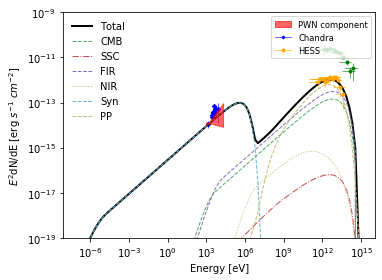

In [81]:
    figure = naima.plot_data(blank, e_unit=u.eV)
    
    ax = figure.axes[0]
    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposy='clip')
    
    
    # Plot fermi data
    #uplims = np.array([0, 0, 1], dtype=bool)
    
    #ax.errorbar(fermi['energy'], fermi['flux'], xerr=fxerr, yerr=fyerr, uplims=uplims, fmt='.', c='gray', elinewidth=0.9, capsize=1.5)
    #ax.plot(fermi['energy'], fermi['flux'], c='gray')
    
    # Plot HESS data
    ax.errorbar(vhe['energy'], vhe['flux'], xerr=vxerr, yerr=vyerr, fmt='.', c='orange', elinewidth=0.6)
    
    # Plot HAWC data
    plt.errorbar(ehwc['energy'], ehwc['flux'], xerr=exerr, yerr=eyerr, fmt='.', c='green', elinewidth=0.6)
    
    # Plot NuSTAR data (range)
    energy = np.array(hard_xray_A['energy'])
    powerlaw1 = (energy**2)*4.2389e-05*(energy**-1.376)*(1.602e-09) #nu_up         
    powerlaw2 = (energy**2)*3.6193e-05*(energy**-1.376)*(1.602e-09) #nu_low        
    powerlaw3 = (energy**2)*2.0541e-05*(energy**-1.651)*(1.602e-09) #pwn_up        
    powerlaw4 = (energy**2)*1.1252e-05*(energy**-1.651)*(1.602e-09) #pwn_low       
    powerlaw5 = (energy**2)*4.2389e-05*(energy**-1.323)*(1.602e-09) #nu_er_up      
    powerlaw6 = (energy**2)*3.6193e-05*(energy**-1.426)*(1.602e-09) #nu_er_low     
    powerlaw7 = (energy**2)*8.3693e-06*(energy**-2.156)*(1.602e-09) #pwn_er_up     
    powerlaw8 = (energy**2)*5.8160e-06*(energy**-1.230)*(1.602e-09) #pwn_er_low    
    #ax.fill_between(hard_xray_A['energy']*1e3, powerlaw1, powerlaw2, color='red', zorder=10, alpha=0.75) #nustar between norms                                    
    #ax.fill_between(hard_xray_A['energy']*1e3, powerlaw3, powerlaw4, color='blue', zorder=10, alpha=0.6) #pwn between norms                                          
    #ax.fill_between(hard_xray_A['energy']*1e3, powerlaw5, powerlaw1, color='orange', zorder=10, alpha=0.6) #nu_er_up                                                
    
    #ax.fill_between(hard_xray_A['energy']*1e3, powerlaw7, powerlaw3, color='red', zorder=10, alpha=0.6) #nu_er_low                                               
    #ax.fill_between(hard_xray_A['energy']*1e3, powerlaw3, powerlaw4, color='red', zorder=10, alpha=0.6) #pwn_er_up
    #ax.fill_between(hard_xray_A['energy']*1e3, powerlaw4, powerlaw8, color='red', zorder=10, alpha=0.6) #pwn_er_low
    ax.fill_between(hard_xray_A['energy']*1e3, powerlaw7, powerlaw8, color='red', zorder=10, alpha=0.6) #pwn full error
    
    # Plot NuSTAR data (points)
    #ax.errorbar(hard_xray_B['energy']*1e3, hard_xray_B['flux'], xerr=hbxerr, yerr=hbyerr, fmt='.', c='red', elinewidth=0.6, zorder=6, alpha=0.75)
    
    # Plot Chandra data
    ax.errorbar(soft_xray['energy']*1e3, soft_xray['flux'], xerr=sxerr, yerr=syerr, fmt=',', c='blue', elinewidth=0.6)
    ax.scatter(soft_xray['energy']*1e3, soft_xray['flux'], marker='D', s=9, c='blue')
    
    # Plot the folded and unfolded model                                           
    energy = np.logspace(-7, 15, 100) * u.eV
    ax.loglog(energy, PP.sed(energy, 4 * u.kpc) + IC.sed(energy, 4 * u.kpc) + SYN.sed(energy, 4 * u.kpc),
              lw=2, c='k', label='Total')
    for i, seed, ls in zip(
            range(4), ['CMB', 'SSC', 'FIR', 'NIR'], ['--', '-.','--', ':']):
        ax.loglog(energy, IC.sed(energy, 4 * u.kpc, seed=seed),
                  lw=1, c=naima.plot.color_cycle[i + 1], label=seed, ls=ls)
    ax.loglog(energy, SYN.sed(energy, 4 * u.kpc), lw=1,
              c=naima.plot.color_cycle[i+2], label='Syn', ls='--')
    ax.loglog(energy, PP.sed(energy, 4 * u.kpc), lw=1,
              c=naima.plot.color_cycle[4], label='PP', ls='--')
    
    ax.set_xlabel("Energy [eV]")
    ax.set_ylabel("$E^2$dN/dE [erg $s^{-1}$ $cm^{-2}$]")

    ax.set_ylim(1e-19, 1e-9)
    #ax.set_ylim(1e-17, 1e-8)
    
    #Set parameter values as title for convenience                                     
#if arg == 'ECPL':                                                                 
#    ax.set_title('Norm: ' + str(pars[0]) + ", E_0: " + str(pars[1]) +             
#                 ', E_cutoff: ' + str(pars[3]) + '\n' + 'Index: ' + str(pars[2]) \+ ', B: ' + str(pars[4]))                                                          
#if arg == 'ECBPL':                                                                
#    ax.set_title('Norm: ' + str(pars[0]) +                                        
#             ', E_break: ' + str(pars[2]) + ', E_cutoff: ' + str(pars[5]) +       
#             '\n' + 'Index 1: ' + str(pars[3]) + ', Index 2: ' + str(pars[4]) +   
#             ', B: ' + str(pars[6]))                                              
#if arg == 'PL':                                                                   
#    ax.set_title('Norm: ' + str(pars[0]) + ", E_0: " + str(pars[1]) + '\n' +      
#                 'Index: ' + str(pars[2]) + ', B: ' + str(pars[3]) + 'We' + str(pars[5])) 

#prompt user for file name input                                                   
# file_name = (input('Enter file name for plot [srcname_ic+syn_' + str(arg) +      
#                   '_#.png]:') or 'srcname_ic+syn_'+str(arg)+'_#.png') 

#legend
    red_patch = mpatches.Patch(color='red', label='PWN component', alpha=0.6)
    blue_line = mlines.Line2D([], [], color='blue', marker='D', markersize=2, linewidth=0.6, label='Chandra')
    orange_line = mlines.Line2D([], [], color='orange', marker='.', markersize=6, linewidth=0.6, label='HESS')
    #plt.legend(handles=[red_patch, blue_line], fontsize='small')

    first_legend = ax.legend(loc='upper left', frameon=False)

    ax = plt.gca().add_artist(first_legend)
    
    plt.legend(handles=[red_patch, blue_line, orange_line], loc='upper right', fontsize='small')

#save and/or plot figure                                                           
    plt.tight_layout()
    #ax.set_aspect(1.75)
    #ax.set_aspect('equal')
    plt.axes().set_aspect(1.75)
    #plt.savefig(str(file_name), dpi=300)
    #plt.savefig('lepto_hadronic_new.png', dpi=300, facecolor='w', edgecolor='w',
    #    orientation='landscape', format='png',
    #   transparent=False, bbox_inches=None, pad_inches=None)
    plt.show()

In [82]:
We_ic = IC.compute_We(Eemin = 0.01*u.TeV)
print(We_ic)

1.2597341905475228e+46 erg


In [83]:
We_syn = SYN.compute_We(Eemin = 0.01*u.TeV)
print(We_syn)

1.7370058259041307e+42 erg


In [84]:
Wp = PP.compute_Wp(Epmin = 0.01*u.TeV)
print(Wp)

3.7955557226882417e+46 erg


In [122]:
Yep

NameError: name 'Yep' is not defined